In [1]:
import pandas as pd


data = pd.read_csv("data/wdbc.data", sep=",", header=None)
# denote features and improve readability
features = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave pts", 
            "symmetry", "frac. dim"]
features3 = []
descr = ["mean", "stderr", "worst"]
for i in range(30):
    if i < 10: 
        features3.append(descr[0] + " "+ features[i%10])
    elif i < 20: 
        features3.append(descr[1] + " " + features[i%10])
    else: 
        features3.append(descr[2] + " " + features[i%10])
data.columns = ["ID", "Malignant/Benign"] + features3
print(data)

           ID Malignant/Benign  mean radius  mean texture  mean perimeter  \
0      842302                M        17.99         10.38          122.80   
1      842517                M        20.57         17.77          132.90   
2    84300903                M        19.69         21.25          130.00   
3    84348301                M        11.42         20.38           77.58   
4    84358402                M        20.29         14.34          135.10   
..        ...              ...          ...           ...             ...   
564    926424                M        21.56         22.39          142.00   
565    926682                M        20.13         28.25          131.20   
566    926954                M        16.60         28.08          108.30   
567    927241                M        20.60         29.33          140.10   
568     92751                B         7.76         24.54           47.92   

     mean area  mean smoothness  mean compactness  mean concavity  \
0     

In [22]:
import numpy as np

# define M as 1 and B as 0

def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

def sig_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def get_inputs(data, features, train_size):
    x = data.loc[:,features]
    classif = data["Malignant/Benign"]
    y = []
    for index in classif:
        if index == "B":
            y.append(0)
        else:
            y.append(1)
    x = np.asarray(x)
    y = np.asarray(y)
    split = int(train_size * len(x))
    return x[:split], y[:split], x[split:], y[split:]

def verify(x_test, y_test, hidden_dim, pre_hidden_nodes, input_to_hidden_w, post_hidden_nodes, hidden_to_out_w, threshold):
    correct = 0
    for index in range(x_test.shape[0]):
        for node in range(hidden_dim):
            pre_hidden_nodes[node] = np.dot(x_test[index], input_to_hidden_w[:, node])
            post_hidden_nodes[node] = sigmoid(pre_hidden_nodes[node])
        pre_output = np.dot(post_hidden_nodes, hidden_to_out_w)
        output = sigmoid(pre_output)

        if output > threshold:
            output = 1
        else:
            output = 0
        if output == y_test[index]:
            correct += 1
    return correct/x_test.shape[0]

def train(n, rate): 
    x_train, y_train, x_test, y_test = get_inputs(data, ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
           'mean concavity'], 0.8)
    N = len(x_train)    


    input_dim = x_train.shape[1]
    hidden_dim = 4
    epochs = n
    threshold = 0.5
    learning_rate = rate

    np.random.seed(159)
    input_to_hidden_w = np.random.uniform(-1, 1, (input_dim, hidden_dim))
    hidden_to_out_w = np.random.uniform(-1, 1, hidden_dim)
    pre_hidden_nodes = np.zeros(hidden_dim)
    post_hidden_nodes = np.zeros(hidden_dim)

    for epoch in range(epochs):
        for index in range(N):
            for node in range(hidden_dim):
                pre_hidden_nodes[node] = np.dot(x_train[index], input_to_hidden_w[:, node])
                post_hidden_nodes[node] = sigmoid(pre_hidden_nodes[node])
            pre_output = np.dot(post_hidden_nodes, hidden_to_out_w)
            output = sigmoid(pre_output)

            error = output - y_train[index]

            for h in range(hidden_dim):
                s = error * sig_deriv(pre_output)
                grad_h_o = s * post_hidden_nodes[h]
                for i in range(input_dim):
                    grad_i_h = x_train[index, i] * s * hidden_to_out_w[h] * sig_deriv(pre_hidden_nodes[h])
                    input_to_hidden_w[h] -= learning_rate * grad_i_h
                hidden_to_out_w[h] -= learning_rate * grad_h_o

    train_err = verify(x_train, y_train, hidden_dim, pre_hidden_nodes, input_to_hidden_w, post_hidden_nodes, hidden_to_out_w,
                       threshold)
    test_err = verify(x_test, y_test, hidden_dim, pre_hidden_nodes, input_to_hidden_w, post_hidden_nodes, hidden_to_out_w,
                      threshold)
    return [train_err, test_err]

In [23]:
train_err, test_err = [], []
n_epochs = 500
l_rate = 0.01
for n in range(20, n_epochs, 20): 
    print("Total epochs: ", n)
    err = train(n, l_rate)
    train_err.append(err[0])
    test_err.append(err[1])
    print(err[0], err[1])
    

Total epochs:  20
0.6175824175824176 0.7807017543859649
Total epochs:  40
0.6461538461538462 0.7894736842105263
Total epochs:  60
0.6527472527472528 0.7982456140350878
Total epochs:  80
0.6527472527472528 0.7982456140350878
Total epochs:  100
0.654945054945055 0.8070175438596491
Total epochs:  120
0.6505494505494506 0.8070175438596491
Total epochs:  140
0.6373626373626373 0.7894736842105263
Total epochs:  160
0.5912087912087912 0.7719298245614035
Total epochs:  180
0.5912087912087912 0.7719298245614035
Total epochs:  200
0.5912087912087912 0.7719298245614035
Total epochs:  220
0.5912087912087912 0.7719298245614035
Total epochs:  240
0.5912087912087912 0.7719298245614035
Total epochs:  260
0.5912087912087912 0.7719298245614035
Total epochs:  280
0.5912087912087912 0.7719298245614035
Total epochs:  300
0.5912087912087912 0.7719298245614035
Total epochs:  320
0.5912087912087912 0.7719298245614035
Total epochs:  340
0.5912087912087912 0.7719298245614035
Total epochs:  360
0.591208791208791

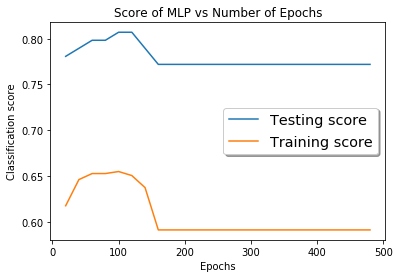

In [25]:
import matplotlib.pyplot as plt

epochs = np.arange(20, n_epochs, 20)
plt.figure()
plt.plot(epochs, test_err, label='Testing score')
plt.plot(epochs, train_err, label='Training score')
plt.xlabel('Epochs')
plt.ylabel('Classification score')
plt.title('Score of MLP vs Number of Epochs')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

In [11]:
print(epochs)

[ 50 100 150 200 250 300 350 400 450]


In [28]:
from sklearn.neural_network import MLPClassifier

x_train, y_train, x_test, y_test = get_inputs(data, ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity'], 0.8)
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=30, alpha=1e-4,
                    solver='sgd', random_state=1,
                    learning_rate_init=.1)

mlp.fit(x_train,y_train)
print(mlp.score(x_train, y_train))
print(mlp.score(x_test, y_test))

0.5912087912087912
0.7719298245614035
